In [103]:
import numpy as np
import pandas as pd
import pickle
import random
from PIL import Image 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import weightedcalcs as wc

In [2]:
with open('../data/processed/df.pickle', 'rb') as file:
     all_ = pickle.load( file)
with open('../data/processed/target.pickle', 'rb') as file:
     y = pickle.load(file)
with open('../data/processed/selected_feat.pickle', 'rb') as file:
     slctd_feat = pickle.load(file)

In [7]:
col_list = slctd_feat.columns
col_list

Index(['imiss_c_2016', 'imiss_f_2016', 'imiss_l_2016', 'imiss_p_2016',
       'imiss_u_2016', 'imiss_x_2016', 'imiss_y_2016'],
      dtype='object')

In [9]:
slctd_feat['weight'] = all_.weight
slctd_feat['target'] = y

In [10]:
weight = slctd_feat['weight']
calc = wc.Calculator('weight')

In [60]:
grouped = slctd_feat.groupby('target')

In [72]:
list = ['immigration', 'terrorism', 'climate change',
        'the budget deficit', 'the size of government', 'racial equality', 'gender equality']
for ind, col in enumerate(col_list):
    freq = calc.distribution(slctd_feat, col).round(3)
    g_freq = calc.distribution(grouped, col).round(3)

    print(list[ind], freq, '\n',
         list[ind], g_freq)

immigration imiss_c_2016
1.0    0.447
2.0    0.359
3.0    0.132
4.0    0.033
8.0    0.029
Name: weight, dtype: float64 
 immigration imiss_c_2016    1.0    2.0    3.0    4.0    8.0
target                                         
1.0           0.304  0.427  0.200  0.038  0.030
2.0           0.616  0.295  0.058  0.020  0.011
3.0           0.399  0.347  0.143  0.047  0.063
terrorism imiss_f_2016
1.0    0.566
2.0    0.285
3.0    0.087
4.0    0.035
8.0    0.027
Name: weight, dtype: float64 
 terrorism imiss_f_2016    1.0    2.0    3.0    4.0    8.0
target                                         
1.0           0.410  0.352  0.158  0.051  0.029
2.0           0.775  0.190  0.012  0.006  0.016
3.0           0.464  0.339  0.093  0.060  0.044
climate change imiss_l_2016
1.0    0.374
2.0    0.235
3.0    0.170
4.0    0.195
8.0    0.025
Name: weight, dtype: float64 
 climate change imiss_l_2016    1.0    2.0    3.0    4.0    8.0
target                                         
1.0           0.657  0.

In [195]:
freq_dict = {'terrorism': .566 , 
             'the budget deficit': .491, 'immigration': .447 ,
             'the size of government': .393,
             'racial equality': .378 ,'climate change': .374, 
             'gender equality': .341}

In [ ]:
freq_dict = {'racial equality': .378, 'climate change': .374,
             'gender equality': .341, 'the size of government': .393,'immigration': .447, 
             'the budget deficit': .491, 'terrorism': .566}

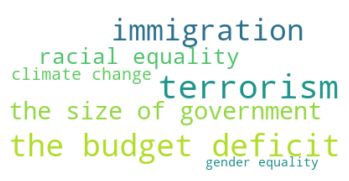

In [196]:
wd = WordCloud(background_color='white', font_step=2)
wd.generate_from_frequencies(frequencies=freq_dict, max_font_size = 40)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

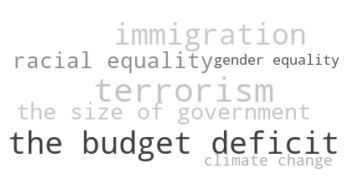

In [197]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(0, 100)
plt.imshow(wd.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
wd.to_file("slctd_feats.png")




In [198]:
freq_dict
list_ = []
val_list = []
for key,val in freq_dict.items():
    list_.append(key)
    val_list.append(val)

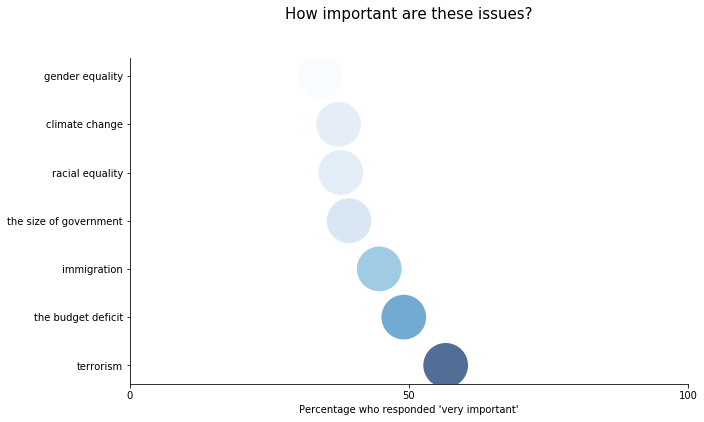

In [202]:
x=val_list
y=list_
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.scatter(x=x, y=y, s=2000, c=x, cmap="Blues", alpha=0.7, edgecolors="grey", linewidth=0)
plt.xlim(0,1)
ax.get_xaxis().set_visible(True)
ax.set_xticks([0, .5, 1])
ax.set_xticklabels([0, 50, 100])
ax.set_xlabel('Percentage who responded \'very important\'')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.set_title('How important are these issues?', fontsize=15, y=1.1)
plt.savefig('bubble_chrt.png')
plt.show()

## plot reps think its v import v dems 